# Three Observable Trends:

* The temperature is the highest around the equator, and decreases the further we get from the equator
* There is no obvious relationship between cloudiness and latitude
* There is no obvious relationship between windiness and latitude



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


615

## Perform API Calls

In [39]:
# OpenWeatherMap API Key
#api_key = api_keys.api_key
#api_key = "33bbd73ac79f5718f1e3589c6bb18531"
# Starting URL for Weather Map API Call

df = pd.DataFrame({"City": cities})
df['Latitude'] = 0
df['Temperature'] = 100000
df['Humidity'] = 0
df['Windiness'] = 0
df['Cloudiness'] = 0

#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
url = "http://api.openweathermap.org/data/2.5/weather?"

#for city in cities:
    
#    query_url = url + "appid=" + api_key + "&q=" + city + "&units=" + "imperial"
#    weather_response = requests.get(query_url)
#    weather_json = weather_response.json()
#    print(f"City {count}: {city}")
#    try: 
#        temp.append(weather_json["main"]["temp"])
#        citylat.append(weather_json["coord"]["lat"])
#        windy.append(weather_json["wind"]["speed"])
#        humid.append(weather_json["main"]["humidity"])
#        cloudy.append(weather_json["clouds"]["all"])
 #       count = count + 1
#    except KeyError:  
#        count = count
    
    
#weather_json



for index, row in df.iterrows():
    
    query_url = url + "appid=" + api_key + "&q=" + df.loc[index, "City"] + "&units=" + "imperial"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    
    try:
        df.loc[index, "Latitude"] = (weather_json["coord"]["lat"])
        df.loc[index, "Windiness"] = (weather_json["wind"]["speed"])
        df.loc[index, "Humidity"] = (weather_json["main"]["humidity"])
        df.loc[index, "Cloudiness"] = (weather_json["clouds"]["all"])
        df.loc[index, "Temperature"] = (weather_json["main"]["temp"])
        print(f"City {index+1}: {df.loc[index, 'City']}")
    
    except KeyError:  
        print(f"Skipping City {index+1}: {df.loc[index, 'City']}")
    

totalcity = len(df[~(df['Temperature'] == 100000)] )

print("------------------------")
print(f"Total Cities: {totalcity}")

df = (df[~(df['Temperature'] == 100000)] ) #only using cities with all info available


City 1: kapaa
City 2: yellowknife
Skipping City 3: manzil tamim
City 4: souillac
City 5: vaini
City 6: tuatapere
Skipping City 7: samusu
City 8: hilo
City 9: havre-saint-pierre
City 10: bikaner
City 11: albany
City 12: barrow
City 13: hun
City 14: busselton
City 15: kavieng
City 16: castro
City 17: jamestown
City 18: hammerfest
City 19: rikitea
City 20: ushuaia
City 21: divinopolis
City 22: saskylakh
City 23: chokurdakh
City 24: mataura
City 25: hithadhoo
City 26: lavrentiya
City 27: tuktoyaktuk
Skipping City 28: fevralsk
City 29: cherskiy
Skipping City 30: illoqqortoormiut
City 31: lebu
City 32: fairbanks
City 33: san nicolas
City 34: alofi
City 35: bluff
City 36: bredasdorp
City 37: punta arenas
City 38: sangre grande
City 39: butaritari
Skipping City 40: sentyabrskiy
City 41: new norfolk
City 42: walvis bay
City 43: kaitangata
City 44: carnarvon
City 45: hermanus
City 46: carballo
City 47: upernavik
City 48: nikolskoye
City 49: ocos
City 50: moose factory
City 51: amapa
City 52: ale

City 406: faya
City 407: galveston
City 408: saldanha
City 409: camocim
Skipping City 410: yusva
City 411: vangaindrano
Skipping City 412: karakose
City 413: yatou
City 414: alice springs
City 415: nakhon phanom
Skipping City 416: wahran
City 417: alyangula
City 418: garhakota
City 419: hanzhong
City 420: luorong
City 421: niihama
City 422: honiara
City 423: daru
City 424: tura
City 425: anahuac
Skipping City 426: mullaitivu
City 427: tuxpan
City 428: najran
City 429: muravlenko
Skipping City 430: kismayo
City 431: smithers
City 432: lewistown
City 433: juan lacaze
City 434: nabannagan
City 435: snyder
City 436: mamit
City 437: kokoda
Skipping City 438: aporawan
City 439: bocana de paiwas
City 440: surazh
City 441: ust-ilimsk
City 442: batemans bay
City 443: ibra
City 444: sjovegan
Skipping City 445: toliary
City 446: grand gaube
City 447: rocha
City 448: port-gentil
City 449: bara
City 450: yinchuan
City 451: hobyo
City 452: marawi
City 453: flinders
City 454: holme
City 455: vestmann

In [40]:
df.head(10)


,City,Latitude,Temperature,Humidity,Windiness,Cloudiness
0,kapaa,22.08,82.11,91,9.17,75
1,yellowknife,62.45,32.00,100,8.05,90
3,souillac,45.60,54.41,71,6.93,0
4,vaini,15.34,71.99,94,2.39,76
5,tuatapere,-46.13,47.87,100,4.41,56
7,hilo,19.71,80.94,61,8.05,20
8,havre-saint-pierre,50.23,42.80,60,6.93,90
9,bikaner,28.02,74.69,51,0.72,0
10,albany,42.65,61.38,55,4.70,75
11,barrow,-38.31,48.50,90,10.22,92


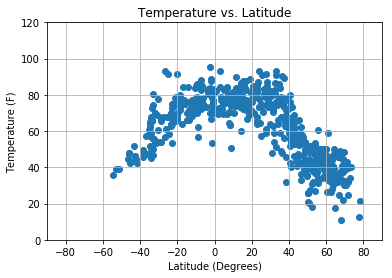

In [41]:
plt.xlabel("Latitude (Degrees)")
plt.ylabel("Temperature (F)")
plt.title("Temperature vs. Latitude")
plt.grid()
plt.xlim(-90,90)
plt.ylim(0,120)



plt.scatter((df['Latitude']),(df['Temperature']))
plt.savefig("Temperature vs Latitude.png")
plt.show()

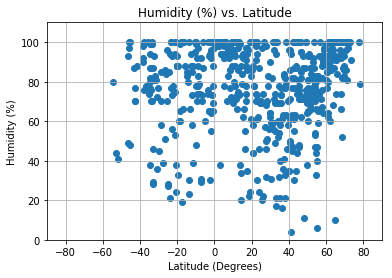

In [42]:
plt.xlabel("Latitude (Degrees)")
plt.ylabel("Humidity (%)")
plt.title("Humidity (%) vs. Latitude")
plt.grid()
plt.xlim(-90,90)
plt.ylim(0,110)


plt.scatter(df["Latitude"], df["Humidity"])
plt.savefig("Humidity vs Latitude.png")
plt.show()

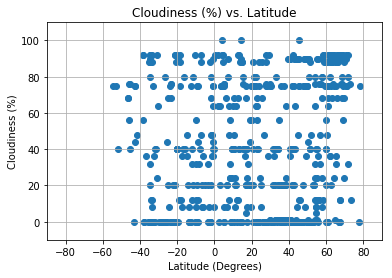

In [43]:
plt.xlabel("Latitude (Degrees)")
plt.ylabel("Cloudiness (%)")
plt.title("Cloudiness (%) vs. Latitude")
plt.grid()
plt.xlim(-90,90)
plt.ylim(-10,110)

plt.scatter(df["Latitude"], df["Cloudiness"])
plt.savefig("Cloudiness vs Latitude.png")
plt.show()

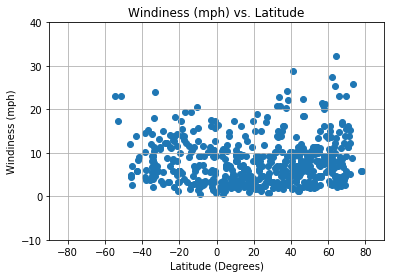

In [44]:
plt.xlabel("Latitude (Degrees)")
plt.ylabel("Windiness (mph)")
plt.title("Windiness (mph) vs. Latitude")
plt.grid()
plt.xlim(-90,90)
plt.ylim(-10,40)

plt.scatter(df["Latitude"], df["Windiness"])
plt.savefig("Windiness vs Latitude.png")
plt.show()

In [45]:
df2 = df.set_index('City', drop=True)

df2.to_csv("City Weather Data.csv")